# **TASK**

#### Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?


How are AHT and AST Calculated?

AHT (Average Handle Time):
Time from when the agent picks up the call to when they hang up
Formula:

***AHT = Total Handle Time / Total Number of Calls***

AST (Average Speed to Answer):
Time spent by the customer in queue till the agent answers the call
Formula:

***AST = Total Waiting Time / Total Number of Calls***

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [34]:
calls = pd.read_csv('/kaggle/input/skyhack/calls.csv')
customers = pd.read_csv('/kaggle/input/skyhack/customers.csv')
reason = pd.read_csv('/kaggle/input/skyhack/reason.csv')
sentiment_statistics = pd.read_csv('/kaggle/input/skyhack/sentiment_statistics.csv')

In [35]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])

# Calculating handle_time and answer_time
calls['handle_time'] = calls['call_end_datetime'] - calls['agent_assigned_datetime']
calls['answer_time'] = calls['agent_assigned_datetime'] - calls['call_start_datetime']

In [36]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,answer_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,0 days 00:07:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,0 days 00:03:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,0 days 00:08:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,0 days 00:05:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,0 days 00:10:00


## **Calculating Average Handle Time and Average Speed to Answer**

In [37]:
# Calculating Total Handle Time and Total Answer Time
total_handle_time = calls['handle_time'].sum()
total_answer_time = calls['answer_time'].sum()

# Total number of calls
total_calls = len(calls)

# Calculating AHT (Average Handle Time) and AST (Average Answer Time)
AHT = total_handle_time / total_calls
AST = total_answer_time / total_calls

AHT, AST

(Timedelta('0 days 00:11:37.048600473'),
 Timedelta('0 days 00:07:17.067539339'))

*RESULT*

AHT = 11:37 minutes
AST = 7:17 minutes

## *Preparing Final Merged DataSet Using call_id*

In [38]:
calls['AHT_bool'] = (AHT < calls["handle_time"])
calls['AST_bool'] = (AST < calls["answer_time"])

# Merge the DataFrames on call_id
merged_df = calls.merge(reason, on='call_id', how='left') \
                  .merge(sentiment_statistics, on='call_id', how='left')

final_columns = [
    'call_id',
    'AST_bool',
    'AHT_bool',
    'primary_call_reason',
    'agent_tone',
    'average_sentiment',
    'silence_percent_average'
]

final_result = merged_df[final_columns]

final_result = final_result.dropna()

kkkkkkkkkkkkkkk

In [ ]:
# Filter the data based on AHT_bool == True
filtered_df = merged_df[merged_df['AHT_bool'] == True]

# Count occurrences of each primary call reason based on AHT_bool
count_data = filtered_df.groupby('primary_call_reason').size()

# Sort the reasons to find the top 10
top_10_reasons = count_data.nlargest(10)
top_5_reasons = top_10_reasons.nlargest(5)

# Create a new DataFrame for plotting (show only top 10 reasons)
final_data = top_10_reasons.sort_values(ascending=False)  # Sort in descending order

# Set Seaborn style for a cleaner look
sns.set(style="whitegrid")

# Increase the figure size for better readability
plt.figure(figsize=(10, 6))  # Adjust width and height here

# Create horizontal bar chart with customized colors
bar_plot = sns.barplot(
    x=final_data.values, 
    y=final_data.index, 
    palette=['#FF5733' if reason in top_5_reasons.index else 'lightgray' for reason in final_data.index], 
    edgecolor='black'
)

# Set title and labels with larger font sizes for better readability
plt.title('Top 10 Primary Call Reasons for exceeded AHT(Top 5 Highlighted)', fontsize=16)
plt.xlabel('Count of Calls', fontsize=14)
plt.ylabel('Primary Call Reason', fontsize=14)

# Remove top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

# Show value labels on each bar
for index, value in enumerate(final_data.values):
    bar_plot.text(value + 3, index, f'{int(value)}', va='center', color='black', fontweight='bold')

# Adjust layout for better appearance
plt.tight_layout()

# Show plot
plt.show()

hhhhhhhhhhhhhhhhhhhhh

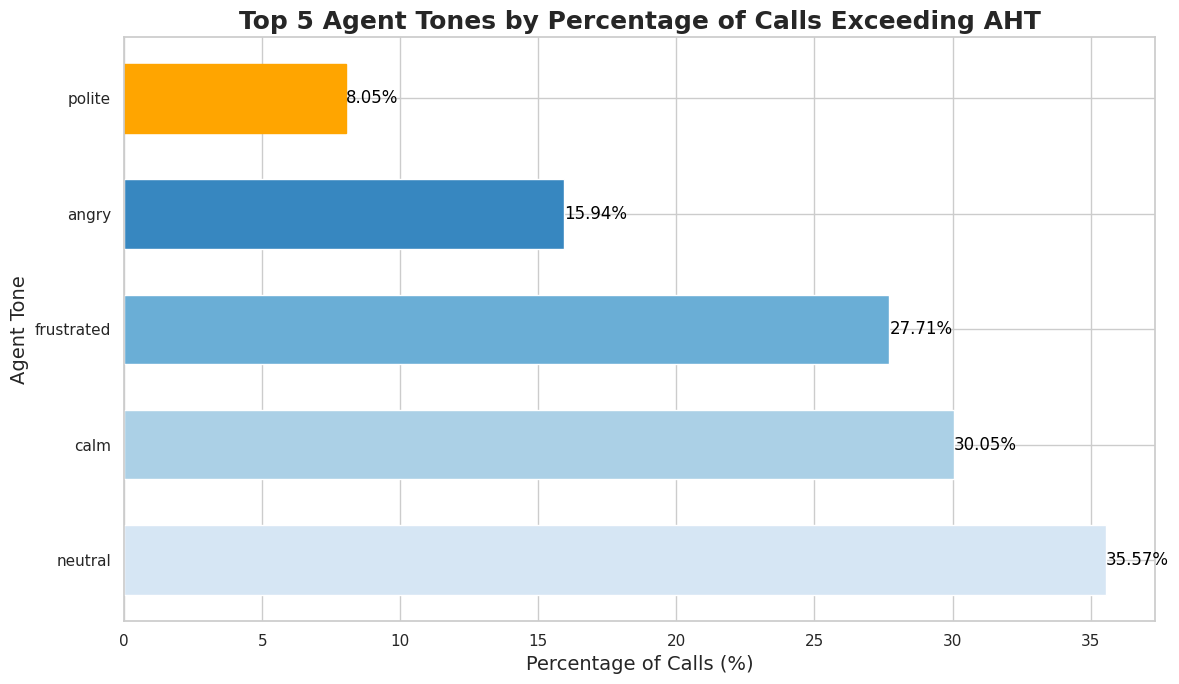

In [40]:
# Set a modern plot style using Seaborn's "whitegrid"
sns.set_style("whitegrid")

# Calculate total number of calls per agent tone
total_tone_counts = merged_df['agent_tone'].value_counts()

# Filter for AHT_bool == True
filtered_df = merged_df[merged_df['AHT_bool'] == True]

# Calculate percentage of calls with AHT_bool == True for each agent_tone
true_tone_counts = filtered_df['agent_tone'].value_counts()
tone_percentages = (true_tone_counts / total_tone_counts) * 100

# Sort the reasons to find the top 5
top_tones = tone_percentages.nlargest(5)

# Increase the figure size for the horizontal axis
plt.figure(figsize=(12, 7))

# Set width and increase gap by setting the width to less than 1
bar_width = 0.6

# Use a color gradient from light blue to dark blue
colors = sns.color_palette("Blues", len(top_tones))

bars = plt.barh(top_tones.index, top_tones.values, color=colors, height=bar_width)

# Highlight the least value bar with a contrasting color (orange)
bars[top_tones.values.argmin()].set_color('orange')

# Add value labels on top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}%', va='center', ha='left', fontsize=12, color='black')

# Set title and labels with custom fonts
plt.title('Top 5 Agent Tones by Percentage of Calls Exceeding AHT', fontsize=18, weight='bold')
plt.xlabel('Percentage of Calls (%)', fontsize=14)
plt.ylabel('Agent Tone', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# cccccccccccccc

ccccccccccccc

In [ ]:
# Plotting line graph between Holding_time and silence_percent_average
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot a line graph using seaborn
sns.lineplot(x='handle_time', y='silence_percent_average', data=merged_df, marker='o', color='b')

# Set title and labels
plt.title('Line Graph: Holding Time vs Silence Percent Average', fontsize=16, weight='bold')
plt.xlabel('Handle Time (seconds)', fontsize=12)
plt.ylabel('Silence Percent Average (%)', fontsize=12)

# Add gridlines for better readability
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

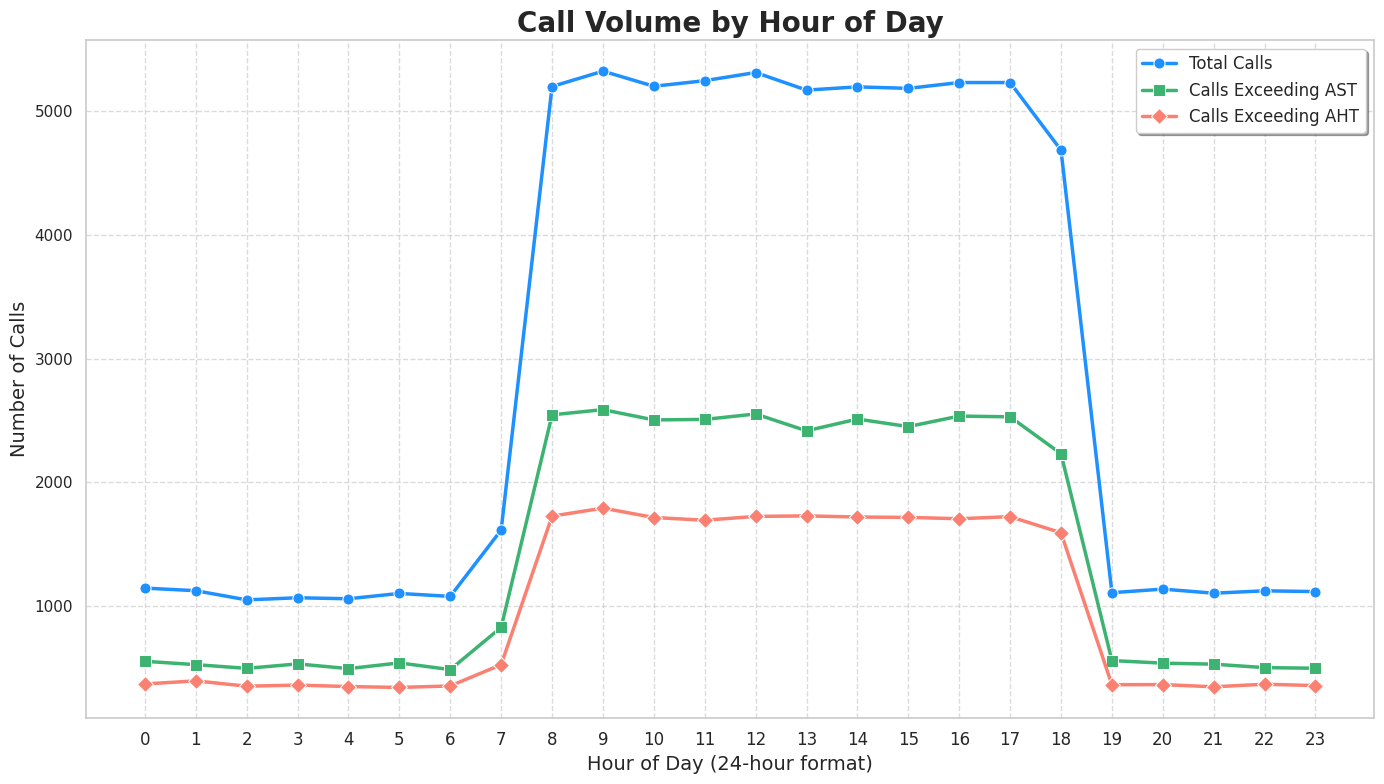

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure call_start_datetime is in datetime format
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])

# Extract the hour from call_start_datetime
merged_df['hour_of_day'] = merged_df['call_start_datetime'].dt.hour

# Group by hour and count calls
total_calls_by_hour = merged_df.groupby('hour_of_day')['call_id'].count()

# Group by hour and count calls exceeding average waiting time (AST_bool == True)
ast_calls_by_hour = merged_df[merged_df['AST_bool'] == True].groupby('hour_of_day')['call_id'].count()

# Group by hour and count calls exceeding average handling time (AHT_bool == True)
aht_calls_by_hour = merged_df[merged_df['AHT_bool'] == True].groupby('hour_of_day')['call_id'].count()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(14, 8))  # Set the figure size

# Plot total volume of calls by hour
sns.lineplot(x=total_calls_by_hour.index, 
             y=total_calls_by_hour.values, 
             label='Total Calls', 
             marker='o', 
             color='dodgerblue', 
             linewidth=2.5, 
             markersize=8)

# Plot volume of calls exceeding average waiting time by hour
sns.lineplot(x=ast_calls_by_hour.index, 
             y=ast_calls_by_hour.values, 
             label='Calls Exceeding AST', 
             marker='s', 
             color='mediumseagreen', 
             linewidth=2.5, 
             markersize=8)

# Plot volume of calls exceeding average handling time by hour
sns.lineplot(x=aht_calls_by_hour.index, 
             y=aht_calls_by_hour.values, 
             label='Calls Exceeding AHT', 
             marker='D', 
             color='salmon', 
             linewidth=2.5, 
             markersize=8)

# Set title and labels with enhanced fonts
plt.title('Call Volume by Hour of Day', fontsize=20, weight='bold')
plt.xlabel('Hour of Day (24-hour format)', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)

# Customize the x-axis ticks for better readability
plt.xticks(range(0, 24), fontsize=12)

# Add gridlines with a lighter style
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend with a slight shadow
plt.legend(fontsize=12, shadow=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
# Convert handle_time to minutes
calls['handle_time_minutes'] = calls['handle_time'].dt.total_seconds() / 60

# Merge calls with reasons
merged_data = calls.merge(reason, on='call_id')

# Calculate average handling time by primary call reason
average_aht = merged_data.groupby('primary_call_reason')['handle_time_minutes'].mean().reset_index()

# Identify the most and least frequent call reasons
reason_counts = merged_data['primary_call_reason'].value_counts()
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

# Get average handling times for the most and least frequent reasons
most_frequent_aht = average_aht.loc[average_aht['primary_call_reason'] == most_frequent_reason, 'handle_time_minutes'].values[0]
least_frequent_aht = average_aht.loc[average_aht['primary_call_reason'] == least_frequent_reason, 'handle_time_minutes'].values[0]

# Calculate percentage difference
percentage_difference = ((most_frequent_aht - least_frequent_aht) / most_frequent_aht) * 100

# Print results
print(f"Average Handling Time for Most Frequent Reason ('{most_frequent_reason}'): {most_frequent_aht:.2f} minutes")
print(f"Average Handling Time for Least Frequent Reason ('{least_frequent_reason}'): {least_frequent_aht:.2f} minutes")
print(f"Percentage Difference: {percentage_difference:.2f}%")

Average Handling Time for Most Frequent Reason ('IRROPS'): 13.09 minutes
Average Handling Time for Least Frequent Reason ('Unaccompanied Minor  '): 3.00 minutes
Percentage Difference: 77.08%
